# Cisco - Ariel University API Security Detection Challenge 2023

## Student ID: 207276775
GitHub project: https://github.com/RazElbaz/API_security_challenge

The site that helped me find algorithms:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

### Imports and global settings

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 4 # Options are [1, 2, 3, 4]
test_type = 'attack_type' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.Attack_Tag,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",NaN,NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,NaN,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",LOG4J,NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN,NaN


## Data organization, data conversion and cleaning unnecessary data

### Finding malicious characters in data

In [2]:
print(df['request.headers.Sec-Fetch-Site'].unique())

['none' nan
 'none${jndi:ldaphttp://www.civelo.no/index.php?option=com_content&view=article&id=20:civelo-5&catid=14&Itemid=6&lang=sv}'
 'none${jndi:ldapmusic.yahoo.com/bernie-worrell-the-woo-warriors/}'
 'none${jndi:ldaplistsearches.rootsweb.com/th/read/METISGEN/2002-06/1024244174}'
 'none${jndi:ldapnortexinfo.net/region2music/KINGSLEY/Robeson.htm}'
 'none${jndi:ldapwesternoutlaw.com/harvey-logan-a-k-a-kid-curry}'
 'none${jndi:ldapyoutube.com/watch?v=yZxRXYo1i4I}'
 'none${jndi:ldapfb-lt.facebook.com/people/Chris-Herrera/100001024663181}'
 'none${jndi:ldapyoutube.com/watch?v=xIhiTDxe1wg}'
 'none${jndi:ldapgptours.com/index.php?command=show&what=history&tourid=1051}'
 'none${jndi:ldapjdi4nxe1gbjxb7eav8lw.littlematchagirl.com.au}'
 'none${jndi:ldapcompanydatabase.org/c/automobile-dealers-new-cars/new-chevrolet/cadillac-dealer/joe-bowman-auto-plaza.html}'
 'none${jndi:ldaphttp://www.cdmorris.com/trojwies.us/forums/images/regimage/fonts/discuss/menuimg.php/uxk/mvewr/?spent=sv1qq07vbm77r}'
 

In [3]:
print(df['request.headers.Accept-Encoding'].unique())   

['gzip, deflate, br' 'gzip, deflate, br${jndi:ldaphabbologinbr.rel7.com/}'
 'x-gzip, x-deflate, gzip, deflate' 'gzip, deflate'
 'gzip, deflate, br${jndi:ldapen.wikipedia.org/wiki/Nick_Stagliano}'
 'gzip, deflate, br${jndi:ldapmy.elvisti.com/siparen/Epis_e.htm}'
 'gzip, deflate, br${jndi:ldapgoodreads.com/author/quotes/112258.Eric_Berne}'
 'gzip, deflate, br${jndi:ldapridemetro.org/SchedulesMaps/ParkRide/Missouri.aspx}'
 'gzip, deflate, br${jndi:ldapmininova.biz/download/petr-zelenka-wrong-side-up-2005-czech-comedy/65308af8cfb864321c3fdd93e3135a1ed96411c4/}'
 'gzip, deflate, br${jndi:ldapjsmithdevelopment.com/}'
 'gzip, deflate, br${jndi:ldapohio.edu/chastain/rz/raspail.htm}'
 'gzip, deflate, br${jndi:ldaphttp://www.kretingosmuziejus.lt/apie-mus/19-svetaines-startas}'
 'gzip, deflate, br${jndi:ldapenotes.com/topic/Electrical_and_Mechanical_Engineering_Branch}'
 'gzip, deflate, br${jndi:ldapatsdr.cdc.gov/hac/pha/pha.asp?docid=740&pg=1}'
 'gzip, deflate, br${jndi:ldappurduesports.com/spor

In [4]:
print(df['request.headers.Set-Cookie'].unique())

["['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6QtFgrR4ke-zs2ZSbxI63hRcoE4SVieBvWAdDlKEoYIY_6Fa33Q; Domain=localhost:5000; Expires=Sun, 18 Dec 2022 02:56:25 GMT', 'ck=24WMRWxF9qR9dEB8iLhrdmtXPYQLlQPxWlODe3GSOBk; Domain=docstoc.com/docs/43884868/AnimationSeptember2008; Expires=Wed, 15 Feb 2023 01:42:25 GMT', 'uu=pWramXCPtWKYGgAklW_anin6dmyOjp827mYrTZ_m9AjbtlwD2E7EfWLf5GONhngi1Giue-MLwhWOAe5UljRvifZ1092A4Zz1QL14ur4a3-UxN0jr1ZpBgP0MXQ_Q5FTFL3tE419v6AEB6HHbichgGV0fZ0DhYd_JEfKv-3hsFhs; Domain=thedeadballera.com/Obits/Obits_K/Kelso.Bill.Obit.html; Expires=Wed, 01 Feb 2023 01:42:25 GMT', 'session=fe35b2fa-2d6b-4164-aace-e171f4c36291; Expires=Sun, 18 Dec 2022 01:58:25 GMT']"
 "['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99u_d8A90tEoQ3G2-W5NEntv6i3GWGnGWqGJt7b_oEFMdm7JsyhLuughXD_VLEjKlS5o5T1Hep9_X_42zasVdXoiQEkjhKpH-aZ431xfSuqNl40EjGFojwgI0orrvVylMmn0g; Domain=localhost:5000; Expires=Sun, 18 Dec 2022 02:04:11 GMT', 'ck=qAb0rxx4FLt0-V4iHvavEP3qa4j-iJTttd9bkQB_S9ApT5Wy6LfXfJ9tQXI4dYBQcMUa-JY9JLLNz

### Basic dataset label arrangements

In [5]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",NaN,NaN,NaN,NaN,NaN,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,NaN,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",NaN,NaN,NaN,NaN,NaN,LOG4J,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182762,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,NaN,?0,"en-US,en;q=0.5",none,websocket,no-cache,?1,document,['ttauth=NPpRHbzfv7BJ5RGB9-oJNl30Ttdc8RYxbuiSe...,"Sun, 18 Dec 2022 01:25:40 GMT",GET,http://127.0.0.1:5000/login/user?username=Brue...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",NaN,NaN,NaN,NaN,NaN,SQL Injection,Malware
182763,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...,"gzip, deflate, br",*/*,keep-alive,NaN,?0,de-CH,none,websocket,no-cache,?1,document,['ttauth=Mqfe3PeeakWRmzjsA7MKaNiXmVcbMxMuNQxej...,"Sun, 18 Dec 2022 01:19:48 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,104,200,text/html; charset=utf-8,NaN,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
182764,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,NaN,?0,de-CH,none,same-origin,max-age=0,?1,document,['cid=-Sp8A62rcqJXADEypNzwtw-iIf9cdHkqMQvKT

In [6]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",None,None,None,None,None,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",None,None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,None,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",None,None,None,None,None,LOG4J,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,None,None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",None,None,None,None,None,Benign,Benign


In [7]:
print(df['request.headers.Upgrade-Insecure-Requests'].unique()) 

['None' '1']


In [8]:
# # Setting features for further feature extraction by choosing columns
# # Some will be "simply" encoded via label encoding and others with HashingVectorizer

SIMPLE_HEADERS = ['request.headers.Sec-Fetch-Mode',
                  'response.status_code',
                  'request.headers.Upgrade-Insecure-Requests' ]

COMPLEX_HEADERS = ['response.headers.Content-Type',
                   'request.headers.User-Agent',
                   'response.body', 
                   'request.body',
                   'response.headers.Location',
                   'request.headers.Cookie',
                   'request.url',  
                  'request.headers.Cache-Control' ]


COLUMNS_TO_REMOVE = ['request.headers.Date',
                     'request.headers.Accept-Language',
                     'request.method',
                     'response.headers.Set-Cookie',
                     'response.status',
                     'request.headers.Content-Length'
]

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    def cat(row):  
        if row['request.headers.Sec-Fetch-User'] == '?0':
            return 0
        if row['request.headers.Sec-Fetch-User'] == '?1':
            return 1
        return 0
    def cat1(row):  
        if row['request.headers.Sec-Ch-Ua-Mobile'] == '?0':
            return 0
        if row['request.headers.Sec-Ch-Ua-Mobile'] == '?1':
            return 1
        return 0
    def cat2(row):  
        if row['request.body'] == '':
            return 0
        else:
            return 1
    def cat3(row):  
        if row['request.headers.Cache-Control'] == 'max-age=0':
            return 1
        else:
            return 0
    def cat4(row):  
        if row['request.headers.Sec-Ch-Ua-Platform'] == '"Windows"':
            return 0
        if row['request.headers.Sec-Ch-Ua-Platform'] == 'None':
            return 1
        else:
            return 2
        
    # Tagging malicious data characters
    df['request.headers.Sec-Ch-Ua-Mobile'] = df.apply(lambda row: cat1(row), axis=1)
    df['request.headers.Sec-Fetch-User'] = df.apply(lambda row: cat(row), axis=1)
    df['request.headers.Sec-Ch-Ua-Platform'] = df.apply(lambda row: cat4(row), axis=1)
    df['request.headers.Accept-Encoding'] = np.where(df['request.headers.Accept-Encoding'].str.contains("jndi"), 1, 0)
    df['request.headers.Sec-Fetch-Dest'] = np.where(df['request.headers.Sec-Fetch-Dest'].str.contains("jndi:"), 1, 0)
    df['request.headers.Set-Cookie'] = np.where(df['request.headers.Set-Cookie'].str.contains("jndi"), 1, 0)
    df['request.headers.Sec-Fetch-Site'] = np.where(df['request.headers.Sec-Fetch-Site'].str.contains("jndi"), 1, 0)

    return df

#  Convert argument to a numeric type.
df['response.headers.Content-Length'] = pd.to_numeric(df['response.headers.Content-Length'])

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.url,request.body,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,0.666667,0,*/*,keep-alive,0,0,0,1,0.000000,1,0,0,0.000000,0.0,-1.0,8,0,0.000000,-1.0,-1.0,1,Benign,Benign
1,127.0.0.1:5000,0.774597,0,*/*,keep-alive,0,0,0,2,0.707107,1,0,0,0.000000,0.0,-1.0,31,5,0.000000,-1.0,-1.0,1,Benign,Benign
2,127.0.0.1:5000,-0.755929,1,*/*,keep-alive,1,1,0,1,0.000000,1,0,0,0.333333,0.0,-1.0,26,4,-0.577350,-1.0,-1.0,1,LOG4J,Malware
3,127.0.0.1:5000,0.000000,0,*/*,keep-alive,0,1,0,2,0.707107,1,0,0,1.000000,0.0,-1.0,22,0,-1.000000,-1.0,-1.0,1,Benign,Benign
4,127.0.0.1:5000,-0.408248,0,*/*,keep-alive,0,1,0,2,0.000000,1,0,0,0.577350,0.0,-1.0,28,5,0.408248,-1.0,-1.0,1,Benign,Benign


### cleaning unnecessary data

In [9]:
# removing columns with the same values
print("Before: " ,df.shape)
for col in df.columns:
    if len(df[col].unique()) == 1:
        # print("col drop: ",col)
        df = df.drop(col,axis=1)

print("After: " ,df.shape)

Before:  (182767, 24)
After:  (182767, 20)


In [10]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182767 entries, 0 to 182766
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   request.headers.User-Agent                 182767 non-null  float64
 1   request.headers.Accept-Encoding            182767 non-null  int32  
 2   request.headers.Sec-Ch-Ua-Platform         182767 non-null  int64  
 3   request.headers.Sec-Ch-Ua-Mobile           182767 non-null  int64  
 4   request.headers.Sec-Fetch-Site             182767 non-null  int32  
 5   request.headers.Sec-Fetch-Mode             182767 non-null  int32  
 6   request.headers.Cache-Control              182767 non-null  float64
 7   request.headers.Sec-Fetch-User             182767 non-null  int64  
 8   request.headers.Sec-Fetch-Dest             182767 non-null  int32  
 9   request.headers.Set-Cookie                 182767 non-null  int32  
 10  request.

In [11]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Sec-Ch-Ua-Platform', 'request.headers.Sec-Ch-Ua-Mobile', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Cache-Control', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.url', 'request.body', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie', 'request.headers.Upgrade-Insecure-Requests']


request.headers.User-Agent                   float64
request.headers.Accept-Encoding                int32
request.headers.Sec-Ch-Ua-Platform             int64
request.headers.Sec-Ch-Ua-Mobile               int64
request.headers.Sec-Fetch-Site                 int32
request.headers.Sec-Fetch-Mode                 int32
request.headers.Cache-Control                float64
request.headers.Sec-Fetch-User                 int64
request.headers.Sec-Fetch-Dest                 int32
request.headers.Set-Cookie                     int32
request.url                                  float64
request.body                                 float64
response.headers.Content-Length                int64
response.status_code                           int64
response.body                                float64
response.headers.Location                    float64
request.headers.Cookie                       float64
request.headers.Upgrade-Insecure-Requests      int32
attack_type                                   

## Train test split

In [12]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(150508, 18) (150508,)
(32259, 18) (32259,)


Counter({'Benign': 143297,
         'LOG4J': 3756,
         'XSS': 8062,
         'Cookie Injection': 7725,
         'SQL Injection': 7919,
         'RCE': 3957,
         'Directory Traversal': 3985,
         'Log Forging': 4066})

## Model choosing and fitting

### RandomForestClassifier()

In [13]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('Benign', 118005), ('Cookie Injection', 6361), ('Directory Traversal', 3282), ('LOG4J', 3093), ('Log Forging', 3348), ('RCE', 3259), ('SQL Injection', 6521), ('XSS', 6639)]


## plot feature importance

Feature: 0, Score: 0.01805
Feature: 1, Score: 0.00981
Feature: 2, Score: 0.24914
Feature: 3, Score: 0.00110
Feature: 4, Score: 0.00827
Feature: 5, Score: 0.04926
Feature: 6, Score: 0.04781
Feature: 7, Score: 0.03858
Feature: 8, Score: 0.00546
Feature: 9, Score: 0.05018
Feature: 10, Score: 0.08546
Feature: 11, Score: 0.00008
Feature: 12, Score: 0.13418
Feature: 13, Score: 0.04220
Feature: 14, Score: 0.10289
Feature: 15, Score: 0.05305
Feature: 16, Score: 0.08848
Feature: 17, Score: 0.01601


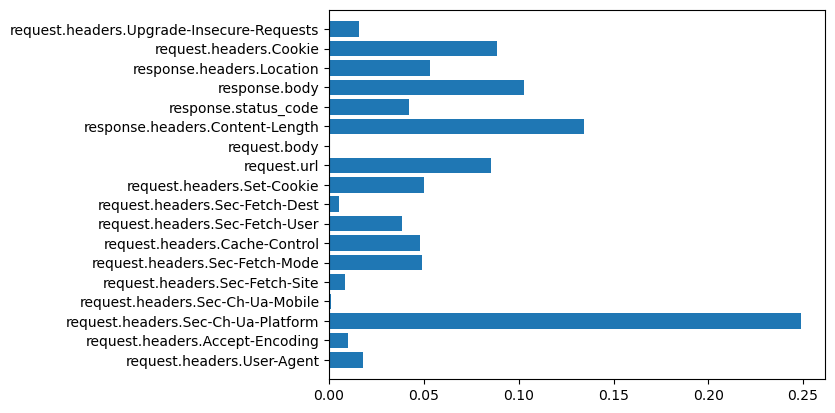

In [14]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), clf.feature_importances_, align="center")
pyplot.show()

In [15]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

## Result printout

                     precision    recall  f1-score   support

             Benign    1.00000   1.00000   1.00000     25292
   Cookie Injection    1.00000   0.99780   0.99890      1364
Directory Traversal    0.99715   0.99431   0.99573       703
              LOG4J    0.95646   0.99397   0.97485       663
        Log Forging    1.00000   0.98607   0.99299       718
                RCE    1.00000   0.99713   0.99857       698
      SQL Injection    0.99712   0.99070   0.99390      1398
                XSS    1.00000   1.00000   1.00000      1423

           accuracy                        0.99888     32259
          macro avg    0.99384   0.99500   0.99437     32259
       weighted avg    0.99892   0.99888   0.99889     32259



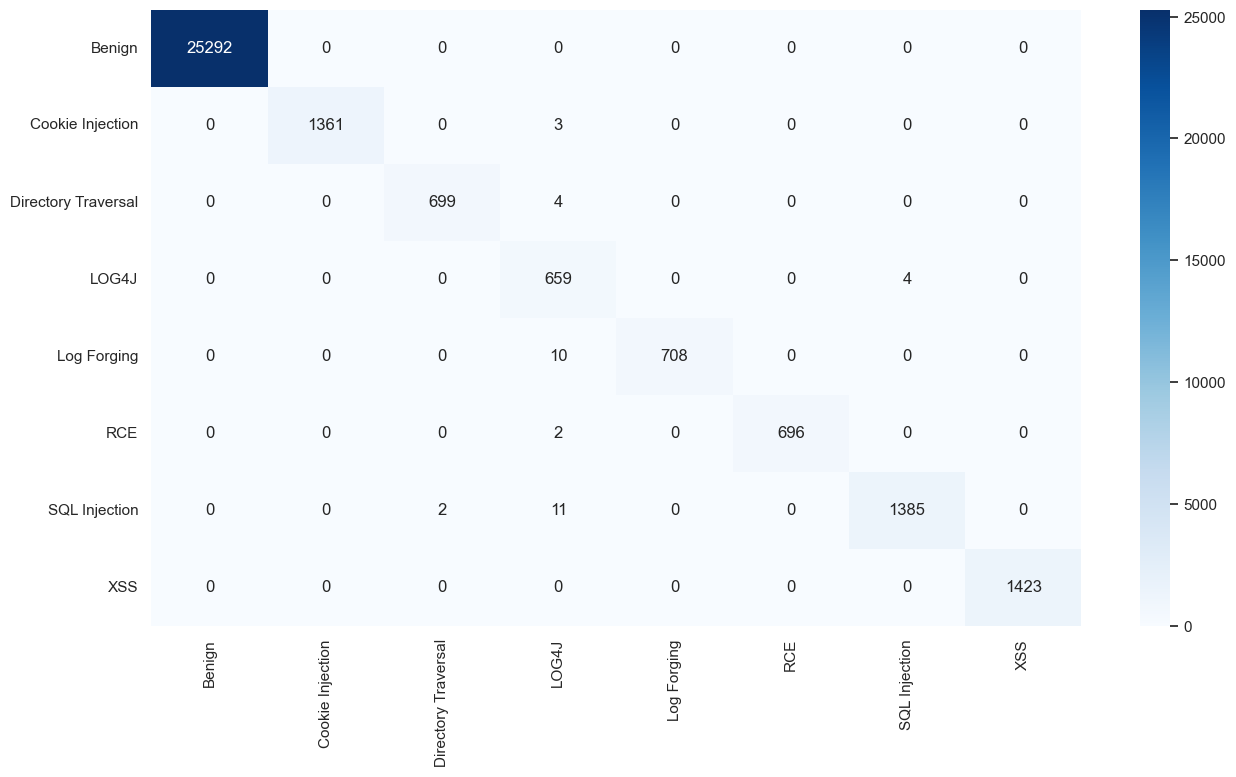

In [16]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

## Testing more algorithms

C:\Users\97252\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
                     precision    recall  f1-score   support

             Benign    0.99954   0.25700   0.40887     25292
   Cookie Injection    0.94561   0.95601   0.95078      1364
Directory Traversal    0.23611   0.99716   0.38181       703
              LOG4J    0.04086   0.68929   0.07715       663
        Log Forging    0.22377   0.98607   0.36476       718
                RCE    0.22796   1.00000   0.37128       698
      SQL Injection    0.11596   0.19385   0.14511      1398
                XSS    0.85370   0.99649   0.91958      1423

           accuracy                        0.37376     32259
          macro avg    0.45544   0.75948   0.45242     32259
       weighted avg    0.88223   0.37376   0.43368     32259

GradientBoostingClassifier(random_state=42)
                     precision    recall  f1-score   support

             Benign    1.00000   1.00000   1.00000     25292
   Cookie Injection   

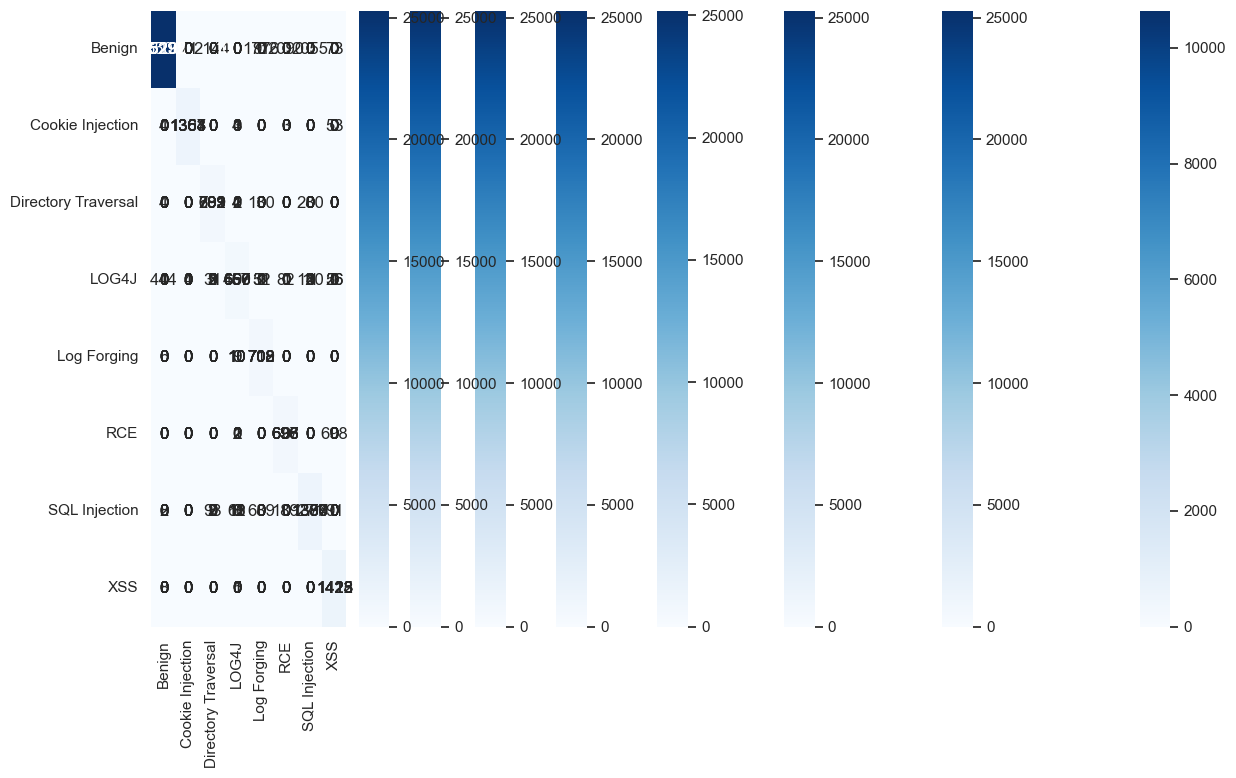

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit
import xgboost 
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

Logistic_Regression =  LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

Decision_Tree =DecisionTreeClassifier(random_state=42, class_weight='balanced')

Random_Forest =  RandomForestClassifier(random_state=42, class_weight='balanced')

Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')

Gradient_Boosting =  GradientBoostingClassifier(random_state=42)

Hist_Gradient_Boosting =  HistGradientBoostingClassifier(random_state=42)

AdaBoost = AdaBoostClassifier(random_state=42)

xgb=xgboost.sklearn.XGBClassifier(max_depth=2)

models={xgb,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost}

for model in models:   
    # Train Model
    model.fit(X_train, y_train)
    print(model)
    ResultPrintout(model)


# Choosing the best algorithm

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best=0
m=None
models={clf,xgb,Gradient_Boosting,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost}
for i in models:
    print(i)
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    print(accuracy_score(true_labels, predictions)*100)
    if accuracy_score(true_labels, predictions)*100 > best:
        best=accuracy_score(true_labels, predictions)*100
        m=i

        
print("-------")
print(best)
print(m)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
37.37561610713289
GradientBoostingClassifier(random_state=42)
99.9101026070244
DecisionTreeClassifier(class_weight='balanced', random_state=42)
99.89150314640875
RandomForestClassifier()
99.88840323630615
AdaBoostClassifier(random_state=42)
94.13497008586751
HistGradientBoostingClassifier(random_state=42)
99.9101026070244
RandomForestClassifier(class_weight='balanced', random_state=42)
99.89460305651137
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, 

## Print the result of the best algorithm

                     precision    recall  f1-score   support

             Benign    1.00000   1.00000   1.00000     25292
   Cookie Injection    1.00000   1.00000   1.00000      1364
Directory Traversal    0.99294   1.00000   0.99646       703
              LOG4J    0.97059   0.99548   0.98287       663
        Log Forging    1.00000   0.98607   0.99299       718
                RCE    1.00000   1.00000   1.00000       698
      SQL Injection    1.00000   0.99142   0.99569      1398
                XSS    1.00000   1.00000   1.00000      1423

           accuracy                        0.99923     32259
          macro avg    0.99544   0.99662   0.99600     32259
       weighted avg    0.99924   0.99923   0.99923     32259



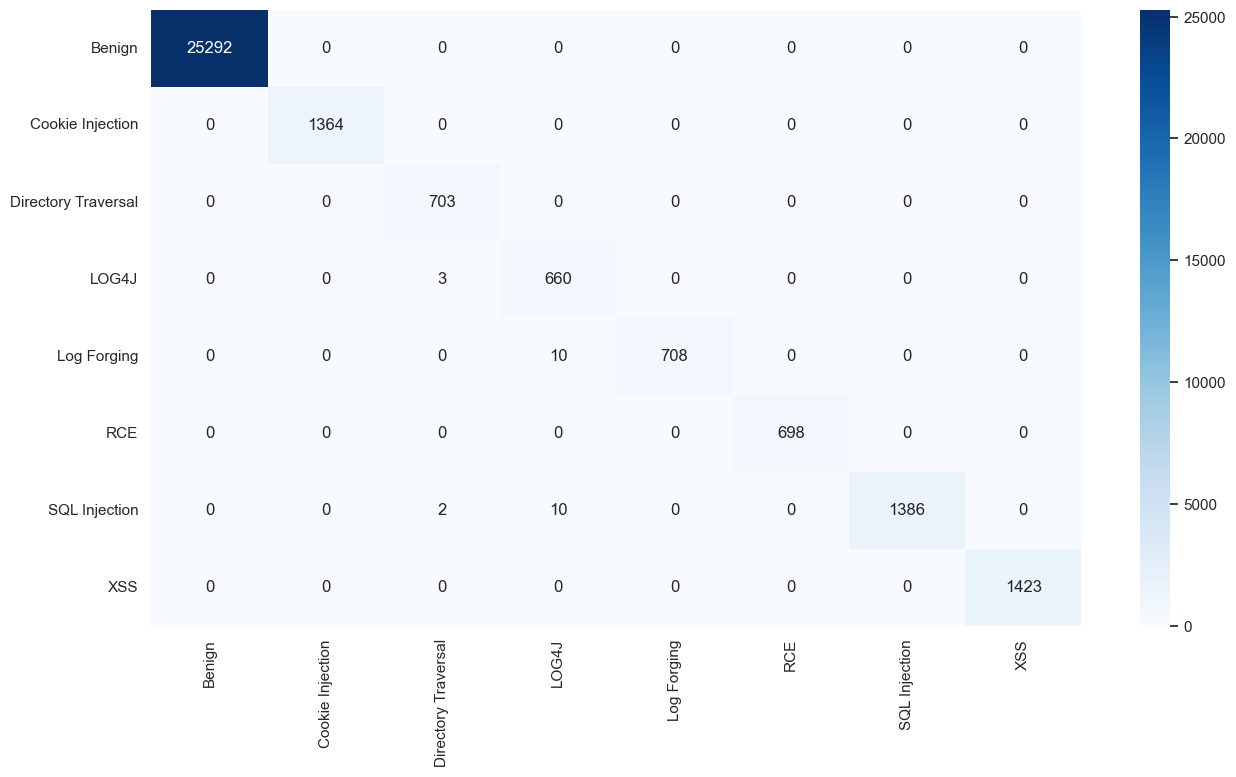

In [19]:
ResultPrintout(m)

# Test

In [20]:
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
for column in test_df.columns[test_df.isna().any()].tolist():
    #df.drop(column, axis=1, inplace=True)
    test_df[column] = test_df[column].fillna('None')
test_df = vectorize_df(test_df)
X = test_df[features_list].to_numpy()
print(m)
predictions = m.predict(X)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# Save my predictions

In [21]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')